In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, skew
import scipy

In [2]:
def read_file(filename):
    x = pickle._Unpickler(open(filename,'rb'))
    x.encoding = 'latin1'
    p = x.load()
    return p

files = []
for n in range(12,16):
    s = 's'
    if n<10:
        s+='0'
    s += str(n)+'.dat'
    files.append(s)

labels = []
data   = []
for i in files:
    trial = read_file(i)
    labels.append(trial['labels'])
    data.append(trial['data'])
    
    
labels = np.array(labels)
labels = labels.flatten()
labels = labels.reshape(160, 4)


data = np.array(data)
data = data.flatten()
data = data.reshape(160, 40, 8064)

In [3]:
labels.shape

(160, 4)

In [4]:
data.shape

(160, 40, 8064)

#  One Hot Encoding

In [5]:
valenciaData = labels[:, :1]
arousalData  = labels[:,1:2]
medianValencia = np.median(valenciaData)
medianArousle  = np.median(arousalData)

In [6]:
def OneHotEncoding(valor,median):
    if valor >= median:
        return 1
    else:
        return 0

In [7]:
DFValencia = []
for i in valenciaData:
    DFValencia.append([OneHotEncoding(i[0],medianValencia)])
    
DFArousal = []
for i in arousalData:
    DFArousal.append([OneHotEncoding(i[0],medianArousle)])

DFValencia = pd.DataFrame(data =DFValencia,columns=['Valence'])
DFArousal = pd.DataFrame(data =DFArousal,columns=['Arousal'])

In [8]:
#ETIQUETA VALENCIA Y ETIQUETA AROUSEL
DFValenciaArrousel = pd.concat([DFValencia,DFArousal],axis=1)
DFValenciaArrousel

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


# Considerar únicamente 32 de los 40 canales 

In [9]:
egg_data = []
for i in range (len(data)):
    for j in range (32):
        egg_data.append(data[i,j])
egg_data = np.reshape(egg_data, (len(data),32,len(data[0,0]))) #(160, 32, 8064)
print(egg_data.shape)

(160, 32, 8064)


# Extraer características de la data (media, varianza, mediana, curtosis,skewness)

In [10]:
media     =  np.mean(egg_data, axis=2)
varianza  =  np.var(egg_data, axis=2) 
mediana   =  np.median(egg_data, axis=2)
curtosis  =  scipy.stats.kurtosis(egg_data, axis=2)
asimetria =  scipy.stats.skew(egg_data, axis=2)
totalData =  np.concatenate((media, varianza, mediana),axis=1) 
totalData =  pd.DataFrame(totalData)
totalData

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,0.371836,0.003666,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,-0.000851,0.308096,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,0.222298,0.159388,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,0.218251,0.164955,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,0.048290,0.106923,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.151505,-0.073370,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.531636,-0.578895,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.178256,-0.207073,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.286763,0.352991,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031


In [11]:
#UNIMOS CON LA ETIQUETA VALENCIA Y ETIQUETA AROUSEL
totalData = pd.concat([totalData,DFValenciaArrousel],axis=1)
totalData

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,Valence,Arousal
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193,1,1
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996,1,1
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206,1,1
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657,1,1
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694,0,0
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439,0,0
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023,0,1
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031,0,0


<AxesSubplot:>

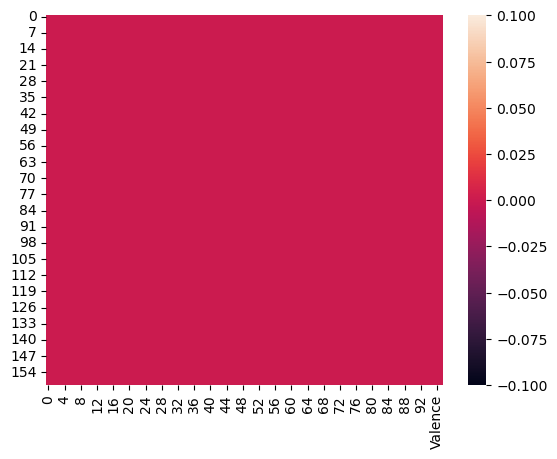

In [12]:
totalData.isnull()
sns.heatmap(totalData.isna())

In [13]:
totalData

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,Valence,Arousal
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193,1,1
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996,1,1
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206,1,1
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657,1,1
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694,0,0
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439,0,0
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023,0,1
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031,0,0


# RED NEURONAL

# Division de datos

In [39]:
from sklearn.model_selection import train_test_split

x = totalData.iloc[:, :-2]
y = totalData[['Valence','Arousal']]

In [40]:
x

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,0.371836,0.003666,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,-0.000851,0.308096,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,0.222298,0.159388,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,0.218251,0.164955,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,0.048290,0.106923,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.151505,-0.073370,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.531636,-0.578895,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.178256,-0.207073,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.286763,0.352991,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031


In [41]:
y

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

# CREACION DEL MODELO

In [43]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import confusion_matrix
from keras import regularizers

In [44]:
model = Sequential()
model.add(Dense(16, input_dim=96, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy']) 

In [45]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.4918 - binary_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5087 - binary_accuracy: 0.4911
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4815 - binary_accuracy: 0.5179
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4717 - binary_accuracy: 0.5268
Epoch 5/100
4/4 [==============================] - 0s 862us/step - loss: 0.4683 - binary_accuracy: 0.5268
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4463 - binary_accuracy: 0.5536
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4659 - binary_accuracy: 0.5268
Epoch 8/100
4/4 [==============================] - 0s 0s/step - loss: 0.4235 - binary_accuracy: 0.5625
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 10/100
4/4 [==============================] - 0s 7ms/step

4/4 [==============================] - 0s 6ms/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 80/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 81/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 82/100
4/4 [==============================] - 0s 644us/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 83/100
4/4 [==============================] - 0s 0s/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 84/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 85/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 86/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 87/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4196 - binary_accuracy: 0.5804
Epoch 88/100
4/4 [==============================] - 0s 5ms/step - l

In [46]:
scores = model.evaluate(x_train, y_train)

4/4 [==============================] - 0s 6ms/step - loss: 0.4196 - binary_accuracy: 0.5804


In [47]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisión del modelo en los datos de prueba:', test_acc)

2/2 [==============================] - 0s 5ms/step - loss: 0.4583 - binary_accuracy: 0.5417
Precisión del modelo en los datos de prueba: 0.5416666865348816


# NORMALIZACION DE DATOS

In [48]:
from sklearn.preprocessing import StandardScaler

# Crea un objeto StandardScaler para normalizar los datos
scaler = StandardScaler()
# Ajusta el objeto scaler al conjunto de datos de entrenamiento
scaler.fit(x_train)
# Normaliza los datos de entrenamiento y de prueba utilizando el objeto scaler
x_train = scaler.transform(x_train)
# Ajusta el objeto scaler al conjunto de datos de entrenamiento
scaler.fit(x_test)
# Normaliza los datos de entrenamiento y de prueba utilizando el objeto scaler
x_test = scaler.transform(x_test)

In [49]:
model = Sequential()
model.add(Dense(16, input_dim=96, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy']) 

In [50]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 0.3032 - binary_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2897 - binary_accuracy: 0.5268
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2801 - binary_accuracy: 0.5357
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2711 - binary_accuracy: 0.5536
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2623 - binary_accuracy: 0.5714
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2535 - binary_accuracy: 0.5893
Epoch 7/100
4/4 [==============================] - 0s 566us/step - loss: 0.2465 - binary_accuracy: 0.5982
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2402 - binary_accuracy: 0.5982
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2357 - binary_accuracy: 0.6071
Epoch 10/100
4/4 [==============================] - 0s 3ms/ste

4/4 [==============================] - 0s 0s/step - loss: 0.1804 - binary_accuracy: 0.7232
Epoch 80/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1799 - binary_accuracy: 0.7232
Epoch 81/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1796 - binary_accuracy: 0.7232
Epoch 82/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1792 - binary_accuracy: 0.7232
Epoch 83/100
4/4 [==============================] - 0s 0s/step - loss: 0.1786 - binary_accuracy: 0.7232
Epoch 84/100
4/4 [==============================] - 0s 0s/step - loss: 0.1783 - binary_accuracy: 0.7232
Epoch 85/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1780 - binary_accuracy: 0.7232
Epoch 86/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1777 - binary_accuracy: 0.7232
Epoch 87/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1773 - binary_accuracy: 0.7232
Epoch 88/100
4/4 [==============================] - 0s 844us/step - los

In [51]:
scores = model.evaluate(x_train, y_train)

4/4 [==============================] - 0s 4ms/step - loss: 0.1725 - binary_accuracy: 0.7232


In [52]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisión del modelo en los datos de prueba:', test_acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.2805 - binary_accuracy: 0.5417
Precisión del modelo en los datos de prueba: 0.5416666865348816
